<font color=blue>
<h1 align=center>Artificial Neural Network </h1>
</font>

## Introduction
We will analyze the mushroom dataset in this project to predict the if a mushroom is poisonous or not based on different properties of mushrooms. It has approx. 8k records with 23 columns for differents features like cap, odor, gill. rings etc. We will :- 
* First, We will analyze the dataset to see the different mushroom properties and their distinct values using Pandas, Matplotlib and Seaborn.
* We will then try to select the specific features for the Neural Network.
* Finally, We fit the model and run a prediction on the test dataset with the below overall goals (in decreasing order of importance):
    * PRIMARY GOAL: Construct a "safe" model. If a mushroom is poisonous, the model should predict (at least as close as possible) that the mushroom truly is poisonous--that is, if the mushroom is poisonous, the model should be highly accurate in predicting that it is poisonous.
    * SECONDARY GOAL: Minimize waste.  If a mushroom edible, the model should not predict that it is poisonous.  
    * PARSIMONY: Once you have achieved the above, next construct the most parsimonious model you can. Anyone can achieve the primary goal by dumping all the predictors into an ANN.  It is harder to achieve the above goal, however, by minimizing model complexity.  Some factors that go into model complexity are:
        * Number of features (e.g., number of input layer nodes)
        * Number of hidden layers
        * Number of epochs
        * The number of neurons within the hidden layers
        
## Mushroom Specifications
The below picture will show all the different part of the mushrooms to help analyzing the dataset :-

<center>
<img src="Mushroom.jpg" width=500 height=500 />
</center  >

## Data Set Information:

This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.


__Attribute Information:__

(classes: edible=e, poisonous=p)

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

## Data Analysis

In [25]:
import pandas as pd
df = pd.read_csv('mushrooms.csv')
print('The number of rows and columns in the dataset correspondingly : ' + str(df.shape) + '\n')
print('Name of the columns in the dataset : \n\n' + str(df.columns) + '\n')
print(df.isnull().sum())
df.head()

The number of rows and columns in the dataset correspondingly : (8124, 23)

Name of the columns in the dataset : 

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


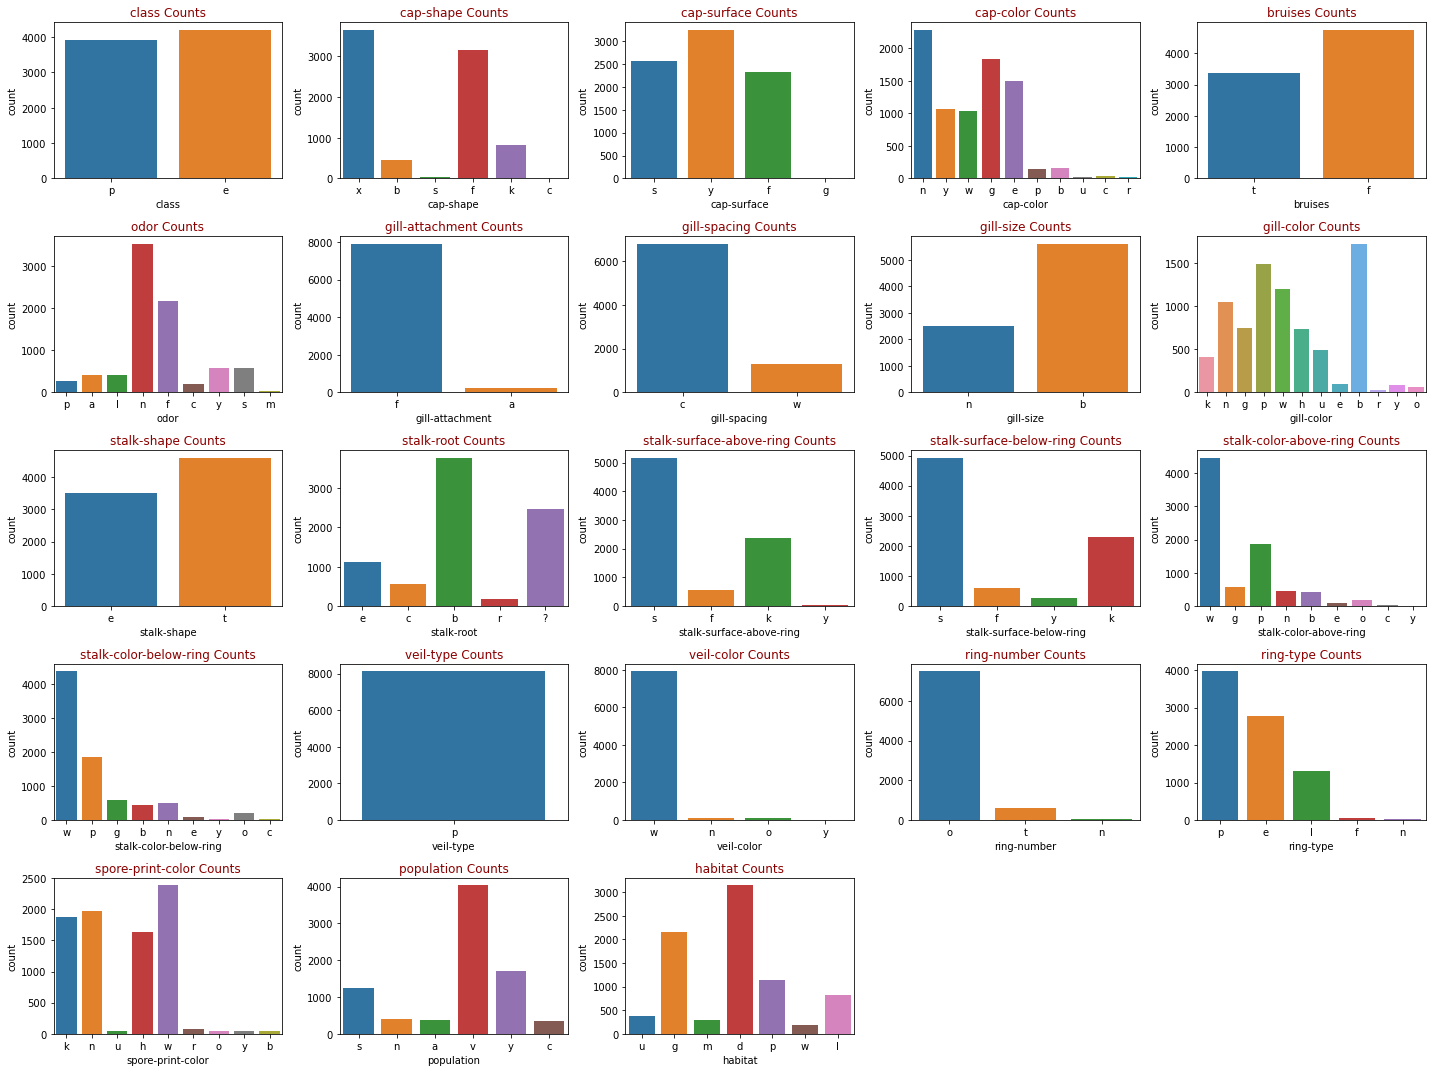

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def cntplt(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,15))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        x_title = feature
        sns.countplot(x = feature,data=df).set_xlabel(x_title)
        ax.set_title(feature+" Counts",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
    
cntplt(df,df.columns,5,5)

### Data Analysis outcome :
* The above analysis shows that there are 23 columns in the dataset with 8124 columns.
* There are no missing values in the dataset
* All the values are categorical. So, We need to convert them into binaries to use them as features in the model.
* The plot shows the distinct value counts in all the columns. There are a lot of distinct values in the "cap-color", "odor", "gill-color","stalk-color-above-ring","stalk-color-below-ring","spore-print-color","population","habitat". It will be very difficult to convert all the values to binaries as it will create a lot of columns. So, We will do some feature engineering to select specific features for the Neural Network.

## Feature Engineering 

In [27]:
def crstb():
    df_rt = pd.DataFrame()
    for i in df:
        df_temp = pd.crosstab(df[i],df['class'])
        df_temp['name'] = i
        df_temp['value'] = df_temp.index
        df_rt = df_rt.append(df_temp)
    return df_rt

The below dataframe shows the number of edible and poisonous mushrooms for each feature and feature value.

In [28]:
df_t = crstb()
df_t

class,e,p,name,value
e,4208,0,class,e
p,0,3916,class,p
b,404,48,cap-shape,b
c,0,4,cap-shape,c
f,1596,1556,cap-shape,f
...,...,...,...,...
l,240,592,habitat,l
m,256,36,habitat,m
p,136,1008,habitat,p
u,96,272,habitat,u


The below dataframe shows only the features and feature values for which the percentage of poisonous or edible mushroom is more than 90%.

In [29]:
df_t['p_per'] = (df_t.p/(df_t.e+df_t.p))*100
df_t['e_per'] = (df_t.e/(df_t.e+df_t.p))*100
df_t2 = df_t.where((df_t['p_per'] > 90) | (df_t['e_per'] > 90)).dropna()
print(df_t2.shape)
df_t2

(56, 6)


class,e,p,name,value,p_per,e_per
e,4208.0,0.0,class,e,0.000000,100.000000
p,0.0,3916.0,class,p,100.000000,0.000000
c,0.0,4.0,cap-shape,c,100.000000,0.000000
s,32.0,0.0,cap-shape,s,0.000000,100.000000
g,0.0,4.0,cap-surface,g,100.000000,0.000000
r,16.0,0.0,cap-color,r,0.000000,100.000000
u,16.0,0.0,cap-color,u,0.000000,100.000000
a,400.0,0.0,odor,a,0.000000,100.000000
c,0.0,192.0,odor,c,100.000000,0.000000
f,0.0,2160.0,odor,f,100.000000,0.000000


__<font color=blue>So, There are approx. 56 feature values out of total 119 that have more than 90% of poisonous or edible mushroom out of the total mushroom in that group. Most of the values are either 100% for either poisonous or edible. So, These must be the greatest differentiator for a mushroom to be poisonous or edible  </font>__

In [49]:
#print(df_t2[['name','value']].drop_duplicates())
df_t3 = pd.DataFrame(df_t2['name'].value_counts())
print(df_t3)
df_t3.index

                          name
odor                         9
stalk-color-above-ring       7
spore-print-color            6
stalk-color-below-ring       6
gill-color                   5
ring-type                    3
veil-color                   3
stalk-root                   2
cap-color                    2
population                   2
class                        2
cap-shape                    2
stalk-surface-below-ring     1
stalk-surface-above-ring     1
habitat                      1
gill-attachment              1
ring-number                  1
gill-spacing                 1
cap-surface                  1


Index(['odor', 'stalk-color-above-ring', 'spore-print-color',
       'stalk-color-below-ring', 'gill-color', 'ring-type', 'veil-color',
       'stalk-root', 'cap-color', 'population', 'class', 'cap-shape',
       'stalk-surface-below-ring', 'stalk-surface-above-ring', 'habitat',
       'gill-attachment', 'ring-number', 'gill-spacing', 'cap-surface'],
      dtype='object')

In [48]:
def cnt():
    Total_cnt = 0
    for i in df:
        Feature_Unique_cnt = len(df[i].unique())
        print(i + '  :  ' + str(Feature_Unique_cnt))
        Total_cnt = Total_cnt + Feature_Unique_cnt
    print( '\nTotal count of unique values of all features : ' + str(Total_cnt))
        
cnt()

class  :  2
cap-shape  :  6
cap-surface  :  4
cap-color  :  10
bruises  :  2
odor  :  9
gill-attachment  :  2
gill-spacing  :  2
gill-size  :  2
gill-color  :  12
stalk-shape  :  2
stalk-root  :  5
stalk-surface-above-ring  :  4
stalk-surface-below-ring  :  4
stalk-color-above-ring  :  9
stalk-color-below-ring  :  9
veil-type  :  1
veil-color  :  4
ring-number  :  3
ring-type  :  5
spore-print-color  :  9
population  :  6
habitat  :  7

Total count of unique values of all features : 119


### Feature Engineering outcomes :
* I identified the counts of poisonous and edibale mushrooms for all distinct values of a feature and selected the feature values that are eithr 90% poisonour or edible mushrooms. I got 56 out of 119 such values from different features.
* Then I compared these selective distinct values with the total count of values in a feature to see how many values play a considerable role for deciding if a mushroom is poisonous or not. I found the below features have very less values out of total values :-
    * 'cap-color' 10-2 - Cap Color only has 2 values out of 10 that have 90% either poisonous or edible mushrooms.
    * 'ring-number' 3-1 - Ring number only has 1 out of 3
    * 'cap-surface' 4-1 - Cap surface has 1 out of 4
    * 'habitat' 7-1 - Habitat has 1 out of 7
    * 'stalk-surface-below-ring' 4-1 - This feature has 1out of 4 
    * 'stalk-surface-above-ring' 4-1 - This also has 1 out of 4 </br>
So, We dropped all the above features from the final list.
* Finally, I selected the below features for model training :- </br>
    * odor
    * stalk-color-above-ring
    * stalk-color-below-ring
    * spore-print-color
    * gill-color
    * veil-color
    * ring-type
    * cap-shape
    * stalk-root
    * population
    * gill-attachment
    * gill-spacing

 

## Artificial Neural Network Model creation and execution

In [63]:
df_features = df[['odor', 'stalk-color-above-ring', 'stalk-color-below-ring',
       'spore-print-color', 'gill-color', 'veil-color', 'ring-type',
       'cap-shape', 'stalk-root', 'population','gill-attachment','gill-spacing']].copy()
        
df_features.head()

,odor,stalk-color-above-ring,stalk-color-below-ring,spore-print-color,gill-color,veil-color,ring-type,cap-shape,stalk-root,population,gill-attachment,gill-spacing
0,p,w,w,k,k,w,p,x,e,s,f,c
1,a,w,w,n,k,w,p,x,c,n,f,c
2,l,w,w,n,n,w,p,b,c,n,f,c
3,p,w,w,k,n,w,p,x,e,s,f,c
4,n,w,w,n,k,w,e,x,e,a,f,w


In [64]:
x = pd.get_dummies(df_features)
x.head()

,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,stalk-color-above-ring_b,...,population_a,population_c,population_n,population_s,population_v,population_y,gill-attachment_a,gill-attachment_f,gill-spacing_c,gill-spacing_w
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,1,0
4,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1


In [65]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

# df_label =pd.DataFrame()
# for column in df.columns:
#     df_label[column] = labelencoder.fit_transform(df[column])
# df_label.head()

y = labelencoder.fit_transform(df['class']).copy()
y

array([1, 0, 0, ..., 0, 1, 0])

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, \
        random_state = 0)

In [67]:
EPOCHS = 20
BATCH_SIZE = 10
ACTIVATION = 'relu'
VERBOSE = 1

In [68]:
import keras
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout

def build_model():
    model = Sequential() #1
    model.add(Dense(10, activation=ACTIVATION, input_dim=78, name='first_hidden')) 
    model.add(Dropout(0.5))

    # second hidden layer.  Use relu
    model.add(Dense(10, activation = ACTIVATION, name='second_hidden'))
    model.add(Dropout(0.5))

    # output layer: use sigmoid since outputting a probability. Only one node
    model.add(Dense(1, activation='sigmoid', name='output'))
    
    model.compile(
        optimizer = 'adam', 
        loss = 'binary_crossentropy', 
        metrics = ['accuracy']) 
    return model

__Model design explained :__
* The model with 78 input nodes based on the above selected features.
* It has only 2 hidden layers with 10 nodes each and the output layer with 1 nodes as it is a binary output ( Poisonous or Edible mushrooms )
* It will only run 20 times with a batch size of 10 in each epoc.
* It will use Relu for hidden layers and Sigmoid function for output layer.
* The optimizer used is Adam and loss function is Binary Crossentropy.

In [69]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
model = KerasClassifier(build_fn=build_model)
history = model.fit(X_train, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    verbose=VERBOSE)

Epoch 1/20
6499/6499 [==============================] - 1s 94us/step - loss: 0.4862 - accuracy: 0.7624
Epoch 2/20
6499/6499 [==============================] - 1s 78us/step - loss: 0.2373 - accuracy: 0.9223
Epoch 3/20
6499/6499 [==============================] - 0s 75us/step - loss: 0.1492 - accuracy: 0.9441
Epoch 4/20
6499/6499 [==============================] - 0s 73us/step - loss: 0.1108 - accuracy: 0.9517
Epoch 5/20
6499/6499 [==============================] - 0s 72us/step - loss: 0.1010 - accuracy: 0.9585
Epoch 6/20
6499/6499 [==============================] - 0s 72us/step - loss: 0.0825 - accuracy: 0.9672
Epoch 7/20
6499/6499 [==============================] - 0s 72us/step - loss: 0.0763 - accuracy: 0.9685
Epoch 8/20
6499/6499 [==============================] - 0s 72us/step - loss: 0.0722 - accuracy: 0.9709
Epoch 9/20
6499/6499 [==============================] - 0s 72us/step - loss: 0.0728 - accuracy: 0.9657
Epoch 10/20
6499/6499 [==============================] - 0s 72us/step - l

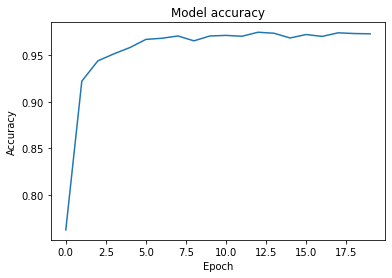

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline 
# if the following line generates an error, change 'acc' to 'accuracy'
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

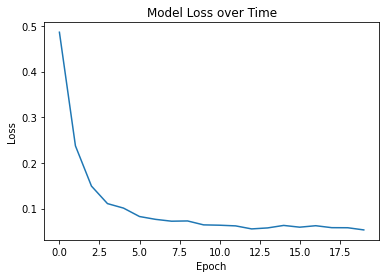

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline 
# if the following line generates an error, change 'acc' to 'accuracy'
plt.plot(history.history['loss'])
plt.title('Model Loss over Time')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [72]:
from sklearn.metrics import confusion_matrix

pred_classes = model.predict(X_train)
confusion_matrix(y_train,pred_classes)

array([[3356,    0],
       [   0, 3143]], dtype=int64)

In [81]:
import numpy as np
np.unique(y_train,return_counts = True)

(array([0, 1]), array([3356, 3143], dtype=int64))

__The above confusion matrix shows :__
* The Model exactly predicted that the there were 3356 edible and 3143 poisonous mushrooms in the train data.
* Model didn't predicted any False Positives and False Negatives. So, The model is well trained.

In [73]:
from sklearn.metrics import confusion_matrix

pred_classes = model.predict(X_test)
confusion_matrix(y_test,pred_classes)

array([[852,   0],
       [  0, 773]], dtype=int64)

In [82]:
np.unique(y_test,return_counts = True)

(array([0, 1]), array([852, 773], dtype=int64))

In [43]:
from sklearn.metrics import classification_report
target_names=['edible', 'posionous'] 
print(classification_report(y_test, pred_classes, target_names=target_names))

              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       852
   posionous       1.00      1.00      1.00       773

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



__The above confusion matrix and classification report shows :__
* The Model exactly predicted that the there were 852 edible and 773 poisonous mushrooms in the test data.
* Model didn't predicted any False Positives and False Negatives. So, The model testing is also return 100% accurate results.
* The classification reports also shows that the model returned 100% correct results with 100% precision.

### Model Outcome
* I trained the model based on the above selected features with 80% of the dataset and used 20% for testing.
* The model accuracy was close to 98% which is good with a loss rate approx. 5% only.
* __PRIMARY GOAL and SECONDARY GOAL accomplishment__ - The model predicted 100% correct results for both poisonous and edible mushrooms with 100% precision. 
* __PARSIMONY GOAL__ - I didn't used the all the features and only used the selected feature based on the analysis in Feature Engineering.


## Conclusion
* The model is approx. 98% accurate based on the minimum epocs and minimum required features to predict 100% correct results.
* The model didn't predict any posinous mushroom as edible or vice versa for both train and test. So, It returned 100% correct results.
* It took the model only 20 epocs to train so well. I tried with increasing the epocs as well but it didn't increase the accuracy. So, I kept it 20 only to use less compute power.
* The model only had 2 hidden layer of 10 nodes each to get this accuracy and results.